In [1]:
import netCDF4
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
climatology_dir= "/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010_numpy/"
input_dir= "/shares/wegner.ics.uzh/CHELSA/input/"

In [18]:
point_to_coord = np.load("/shares/wegner.ics.uzh/CHELSA/input/point_to_coord.npy")
print(point_to_coord.shape) # (224368589, 2)
mar = np.load("/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010_numpy/03_monthly_float16_land_only.npy")
print(mar.shape) # (11, 224368589)

(224368589, 2)
(11, 224368589)


In [36]:
print(point_to_coord[:5])

[[-79.84597262  81.50402709]
 [-79.83763929  81.50402709]
 [-79.82930596  81.50402709]
 [-79.82097262  81.50402709]
 [-79.81263929  81.50402709]]


In [44]:
file2read = netCDF4.Dataset('/shares/wegner.ics.uzh/ERA5/data_0.nc','r')
temp_0 = file2read.variables
print(temp_0.keys())
file2read = netCDF4.Dataset('/shares/wegner.ics.uzh/ERA5/data_1.nc','r')
temp_1 = file2read.variables
print(temp_1.keys())
#data = temp[:]*1
#file2read.close()

dict_keys(['number', 'valid_time', 'latitude', 'longitude', 'expver', 'tcc', 't2m', 'si10', 'ie'])
dict_keys(['number', 'valid_time', 'latitude', 'longitude', 'expver', 'tp', 'pev', 'avg_sdswrf', 'avg_ie'])


In [45]:
data_1_layers = ['tp', 'pev', 'avg_sdswrf', 'avg_ie']  # total_precipitation potential_evaporation mean_surface_downward_short_wave_radiation_flux mean_evaporation_rate
data_0_layers = ['tcc', 't2m', 'si10', 'ie']  # total_cloud_cover 2m_temperature 10m_wind_speed instantaneous_moisture_flux

In [33]:
#Create point_to_coord file
lats = temp["latitude"][:] 
lons = temp["longitude"][:]
print(lons.shape, lats.shape)
print(lons[0], lats[-2])

(1440,) (721,)
0.0 -89.75


In [35]:
for idx in range(len(lons)):
    lon = lons[idx]
    if lon > 180:
        lons[idx] = -180 - (180 - lon)
print(lons[700:740])

[ 175.    175.25  175.5   175.75  176.    176.25  176.5   176.75  177.
  177.25  177.5   177.75  178.    178.25  178.5   178.75  179.    179.25
  179.5   179.75  180.   -179.75 -179.5  -179.25 -179.   -178.75 -178.5
 -178.25 -178.   -177.75 -177.5  -177.25 -177.   -176.75 -176.5  -176.25
 -176.   -175.75 -175.5  -175.25]


In [39]:
ptc_era5 = []
for lat in lats:
    for lon in lons:
        ptc_era5.append([lon, lat])

[[-1.25, -90.0], [-1.0, -90.0], [-0.75, -90.0], [-0.5, -90.0], [-0.25, -90.0]]


In [40]:
print(ptc_era5[-5:])
np.save('/shares/wegner.ics.uzh/ERA5/point_to_coord.npy', ptc_era5)

[[-1.25, -90.0], [-1.0, -90.0], [-0.75, -90.0], [-0.5, -90.0], [-0.25, -90.0]]


In [57]:
ras = []
new_keys = []
for i in range(4):
    ras.append(temp_0[data_0_layers[i]][:])
    new_keys.append(data_0_layers[i])
    ras.append(temp_1[data_1_layers[i]][:])
    new_keys.append(data_1_layers[i])
ras = np.stack(ras)
print(ras.shape)
print(new_keys)

(8, 12, 721, 1440)
['tcc', 'tp', 't2m', 'pev', 'si10', 'avg_sdswrf', 'ie', 'avg_ie']


In [71]:
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
for idx in range(12):
    r = ras[:,idx].reshape(8, -1)
    r = (r - r.mean(axis=1).reshape(8,1)) / r.std(axis=1).reshape(8,1)
    r = r.filled(r.fill_value)
    np.save("/shares/wegner.ics.uzh/ERA5/" + months[idx] + "_monthly_float16_land_only.npy", r.astype("float16"))

In [75]:
ras = np.load("/shares/wegner.ics.uzh/ERA5/03_monthly_float16_land_only.npy")

In [76]:
print(ras.max(axis=1), ras.min(axis=1), ras.mean(axis=1))

[ 1.713  31.61    1.409   0.6094  3.727   2.236   1.386   1.182 ] [-3.555  -0.7754 -2.783  -6.83   -2.25   -1.784  -4.51   -4.805 ] [ 1.07e-06 -1.91e-06 -1.43e-06  2.63e-05  5.96e-08 -5.96e-08  5.36e-07
 -3.58e-07]


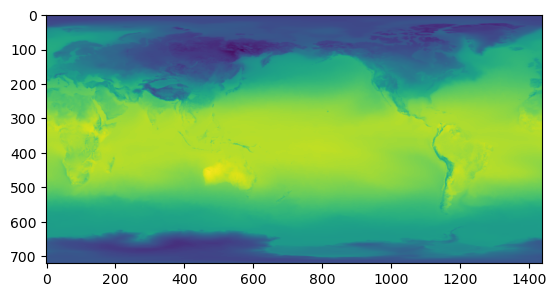

In [30]:
import matplotlib.pyplot as plt
plt.imshow(temp['t2m'][0]) # First dimension controls lat, second lon